In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tools.rsa import correlate_rsms
from scipy.stats import pearsonr
from collections import defaultdict
from joblib import Parallel, delayed
from statsmodels.stats.multitest import multipletests






The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Hypothesis testing simulation based on SPoSE

In [9]:
results_df


,n_objects,snr,repeat,hypothesis,method,raw_p,corrected_p,significant
0,50,0.0,0,1,RSA,0.980198,0.980198,False
1,50,0.0,0,2,RSA,0.227723,0.754950,False
2,50,0.0,0,3,RSA,0.801980,0.891089,False
3,50,0.0,0,4,RSA,0.554455,0.754950,False
4,50,0.0,0,5,RSA,0.277228,0.754950,False
...,...,...,...,...,...,...,...,...
29995,200,0.7,99,6,NMF,0.009901,0.009901,True
29996,200,0.7,99,7,NMF,0.009901,0.009901,True
29997,200,0.7,99,8,NMF,0.009901,0.009901,True
29998,200,0.7,99,9,NMF,0.009901,0.009901,True


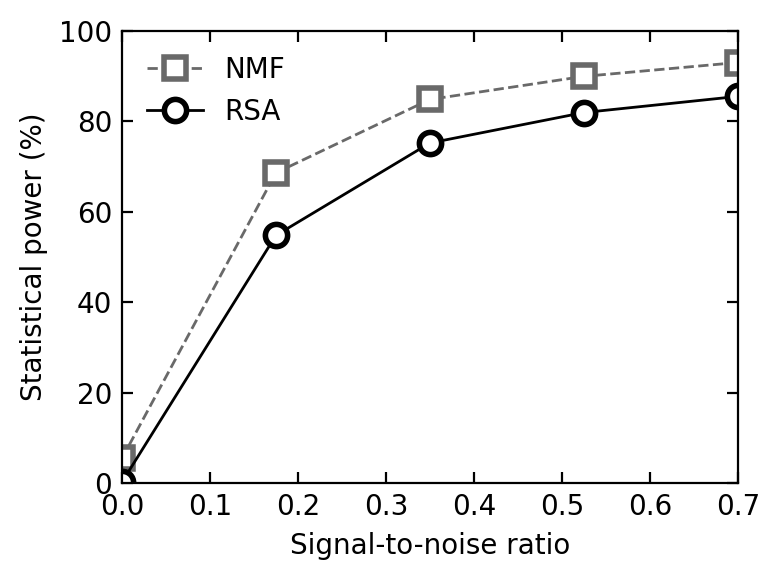

In [8]:
# results_df = pd.read_csv(
#     "/LOCAL/fmahner/similarity-factorization/results/benchmarks/hypothesis_tests.csv"
# )

results_df = pd.read_csv("../results/rsa_comparison.csv")

power_df = results_df.groupby(["snr", "method"])["significant"].mean().reset_index()
power_df["significant"] *= 100

plt.figure(figsize=(4, 3), dpi=200)

bw_colors = {
    "RSA": "black",
    "NMF": "dimgray",
}
bw_styles = {
    "RSA": ("-", "o"),
    "NMF": ("--", "s"),
}

for method in power_df["method"].unique():
    method_df = power_df[power_df["method"] == method]
    linestyle, marker = bw_styles.get(method, ("-", "o"))
    plt.plot(
        method_df["snr"],
        method_df["significant"],
        label=method,
        color=bw_colors.get(method, "black"),
        linestyle=linestyle,
        marker=marker,
        linewidth=1.0,
        markersize=8,
        markerfacecolor="white",
        markeredgewidth=2,
    )

plt.xlabel("Signal-to-noise ratio", fontsize=10)
plt.ylabel("Statistical power (%)", fontsize=10)
plt.legend(fontsize=10, frameon=False)
plt.xlim(0, power_df["snr"].max())
plt.ylim(0, 100)
plt.tick_params(
    direction="in",
    top=True,
    right=True,
    which="both",
    labelsize=10,
    length=4,
)
plt.tight_layout()
